<a href="https://colab.research.google.com/github/Rishapriakanth/Machine-learning-analysis/blob/main/Stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
data = pd.read_csv("/content/Market.csv")
data.head(10)

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
5,NYA,1/7/1966,532.599976,532.599976,532.599976,532.599976,532.599976,0.0
6,NYA,1/10/1966,533.869995,533.869995,533.869995,533.869995,533.869995,0.0
7,NYA,1/11/1966,534.289978,534.289978,534.289978,534.289978,534.289978,0.0
8,NYA,1/12/1966,533.340027,533.340027,533.340027,533.340027,533.340027,0.0
9,NYA,1/13/1966,534.400024,534.400024,534.400024,534.400024,534.400024,0.0


In [4]:
df = pd.DataFrame(data)
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
52942,399001.SZ,10/6/2000,NaN,NaN,NaN,NaN,NaN,NaN
52943,399001.SZ,10/9/2000,4534.850098,4544.049805,4478.669922,4507.580078,4507.529785,0.0
52944,399001.SZ,10/10/2000,4510.200195,4573.410156,4502.569824,4572.209961,4572.158691,0.0
52945,399001.SZ,10/11/2000,4587.410156,4596.240234,4550.350098,4557.310059,4557.258789,0.0


In [6]:
info = df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52947 entries, 0 to 52946
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      52947 non-null  object 
 1   Date       52947 non-null  object 
 2   Open       52205 non-null  float64
 3   High       52204 non-null  float64
 4   Low        52203 non-null  float64
 5   Close      52202 non-null  float64
 6   Adj Close  52196 non-null  float64
 7   Volume     52204 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.2+ MB


,Open,High,Low,Close,Adj Close,Volume
count,52205.000000,52204.000000,52203.000000,52202.000000,52196.000000,5.220400e+04
mean,6097.852175,6131.766477,6059.002391,6097.164174,6097.505091,2.642727e+09
std,6514.776422,6551.739892,6469.496583,6511.692463,6511.946963,5.980909e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1428.760010,1436.427460,1418.961975,1429.362457,1430.174225,0.000000e+00
50%,3277.323975,3291.036499,3260.100098,3277.520019,3276.000000,5.265500e+07
75%,9287.599609,9341.362305,9208.520019,9279.060059,9279.675048,2.014854e+09
max,33335.480470,33484.078130,32897.039060,33154.121090,33154.121090,9.440374e+10


In [7]:
df['Date']=pd.to_datetime(df['Date'], utc=True)
df['date'] = [d.date() for d in df['Date']]
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,date
0,NYA,1965-12-31 00:00:00+00:00,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,1965-12-31
1,NYA,1966-01-03 00:00:00+00:00,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,1966-01-03
2,NYA,1966-01-04 00:00:00+00:00,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,1966-01-04
3,NYA,1966-01-05 00:00:00+00:00,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,1966-01-05
4,NYA,1966-01-06 00:00:00+00:00,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,1966-01-06
...,...,...,...,...,...,...,...,...,...
52942,399001.SZ,2000-10-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2000-10-06
52943,399001.SZ,2000-10-09 00:00:00+00:00,4534.850098,4544.049805,4478.669922,4507.580078,4507.529785,0.0,2000-10-09
52944,399001.SZ,2000-10-10 00:00:00+00:00,4510.200195,4573.410156,4502.569824,4572.209961,4572.158691,0.0,2000-10-10
52945,399001.SZ,2000-10-11 00:00:00+00:00,4587.410156,4596.240234,4550.350098,4557.310059,4557.258789,0.0,2000-10-11


In [8]:
correct_date=pd.to_datetime(df['date'], format='%Y-%m-%d').dt.strftime('%m-%d-%Y')
df1=pd.DataFrame(correct_date)
df['date']=df1['date'].astype('datetime64[ns]')
df2=df['date'].dt.year
df['year']=df2.astype('string')
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,date,year
0,NYA,1965-12-31 00:00:00+00:00,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,1965-12-31,1965
1,NYA,1966-01-03 00:00:00+00:00,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,1966-01-03,1966
2,NYA,1966-01-04 00:00:00+00:00,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,1966-01-04,1966
3,NYA,1966-01-05 00:00:00+00:00,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,1966-01-05,1966
4,NYA,1966-01-06 00:00:00+00:00,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,1966-01-06,1966
...,...,...,...,...,...,...,...,...,...,...
52942,399001.SZ,2000-10-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2000-10-06,2000
52943,399001.SZ,2000-10-09 00:00:00+00:00,4534.850098,4544.049805,4478.669922,4507.580078,4507.529785,0.0,2000-10-09,2000
52944,399001.SZ,2000-10-10 00:00:00+00:00,4510.200195,4573.410156,4502.569824,4572.209961,4572.158691,0.0,2000-10-10,2000
52945,399001.SZ,2000-10-11 00:00:00+00:00,4587.410156,4596.240234,4550.350098,4557.310059,4557.258789,0.0,2000-10-11,2000


In [12]:
df3=df['date'].dt.month
month=[]
for i in df3:
    if i ==1:
        month.append("January")
    if i ==2:
        month.append("February")
    if i ==3:
        month.append("March")
    if i ==4:
        month.append("April")
    if i ==5:
        month.append("May")
    if i ==6:
        month.append("June")
    if i ==7:
        month.append("July")
    if i ==8:
        month.append("August")
    if i ==9:
        month.append("September")
    if i ==10:
        month.append("October")
    if i ==11:
        month.append("November")
    if i ==12:
        month.append("December")


df3=pd.DataFrame(month)
df['month'] = df3
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,date,year,month
0,NYA,1965-12-31 00:00:00+00:00,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,1965-12-31,1965,December
1,NYA,1966-01-03 00:00:00+00:00,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,1966-01-03,1966,January
2,NYA,1966-01-04 00:00:00+00:00,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,1966-01-04,1966,January
3,NYA,1966-01-05 00:00:00+00:00,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,1966-01-05,1966,January
4,NYA,1966-01-06 00:00:00+00:00,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,1966-01-06,1966,January
...,...,...,...,...,...,...,...,...,...,...,...
52942,399001.SZ,2000-10-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2000-10-06,2000,October
52943,399001.SZ,2000-10-09 00:00:00+00:00,4534.850098,4544.049805,4478.669922,4507.580078,4507.529785,0.0,2000-10-09,2000,October
52944,399001.SZ,2000-10-10 00:00:00+00:00,4510.200195,4573.410156,4502.569824,4572.209961,4572.158691,0.0,2000-10-10,2000,October
52945,399001.SZ,2000-10-11 00:00:00+00:00,4587.410156,4596.240234,4550.350098,4557.310059,4557.258789,0.0,2000-10-11,2000,October


In [23]:
Df = round(df)
Df
FinalDf = Df[Df['Index'] == 'NYA']
FinalDf

,Index,Date,Open,High,Low,Close,Adj Close,Volume,date,year,month
0,NYA,1965-12-31 00:00:00+00:00,529.0,529.0,529.0,529.0,529.0,0.000000e+00,1965-12-31,1965,December
1,NYA,1966-01-03 00:00:00+00:00,527.0,527.0,527.0,527.0,527.0,0.000000e+00,1966-01-03,1966,January
2,NYA,1966-01-04 00:00:00+00:00,528.0,528.0,528.0,528.0,528.0,0.000000e+00,1966-01-04,1966,January
3,NYA,1966-01-05 00:00:00+00:00,531.0,531.0,531.0,531.0,531.0,0.000000e+00,1966-01-05,1966,January
4,NYA,1966-01-06 00:00:00+00:00,532.0,532.0,532.0,532.0,532.0,0.000000e+00,1966-01-06,1966,January
...,...,...,...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24 00:00:00+00:00,16375.0,16509.0,16375.0,16465.0,16465.0,2.947400e+09,2021-05-24,2021,May
13944,NYA,2021-05-25 00:00:00+00:00,16465.0,16526.0,16375.0,16390.0,16390.0,3.420870e+09,2021-05-25,2021,May
13945,NYA,2021-05-26 00:00:00+00:00,16390.0,16466.0,16388.0,16452.0,16452.0,3.674490e+09,2021-05-26,2021,May
13946,NYA,2021-05-27 00:00:00+00:00,16452.0,16546.0,16452.0,16532.0,16532.0,5.201110e+09,2021-05-27,2021,May


In [22]:
FinalDf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,13947.000000,13946.000000,13945.000000,13944.000000,13938.000000,1.394700e+04
mean,4452.144834,4469.313495,4434.260739,4453.026033,4455.093916,1.215565e+09
std,4074.832916,4094.959937,4052.814928,4075.484621,4075.457549,1.834155e+09
min,348.000000,348.000000,348.000000,348.000000,348.000000,0.000000e+00
25%,655.000000,655.000000,655.000000,655.000000,656.000000,0.000000e+00
50%,2632.000000,2632.000000,2632.000000,2632.000000,2633.000000,0.000000e+00
75%,7339.500000,7376.500000,7278.000000,7339.750000,7342.750000,2.681975e+09
max,16590.000000,16686.000000,16532.000000,16590.000000,16590.000000,1.145623e+10


In [25]:
FinalDf.isnull().sum()

Index         0
Date          0
Open          1
High          2
Low           3
Close         4
Adj Close    10
Volume        1
date          0
year          0
month         0
dtype: int64

In [26]:
FinalDf.shape

(13948, 11)

In [27]:
DF = FinalDf.dropna()
DF.shape

(13932, 11)

In [28]:
DF.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
date         0
year         0
month        0
dtype: int64

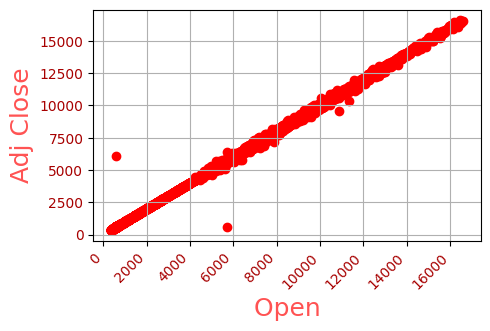

In [29]:
plt.figure(figsize=(5,3))
color = "#ff0000"
color_t = "#ff5252"
text_color = "#a70000"
custom_palette = ["#0096c7", "#f72585"]

plt.scatter(DF['Open'],DF['Adj Close'] , color=color)
plt.xticks(rotation=45, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel(' Open ', color=color_t, fontsize=18)
plt.ylabel('Adj Close' , color=color_t, fontsize=18)
plt.grid()
# Show the plot
plt.show()

In [30]:
OpenAdjCloseNoise1 = DF[(DF['Open'] >= 0) & (DF['Open'] <= 2000) & (DF['Adj Close'] >= 6000) & (DF['Adj Close'] <= 8000)]
OpenAdjCloseNoise1

,Index,Date,Open,High,Low,Close,Adj Close,Volume,date,year,month
831,NYA,1969-05-29 00:00:00+00:00,612.0,612.0,612.0,612.0,6111.0,0.0,1969-05-29,1969,May


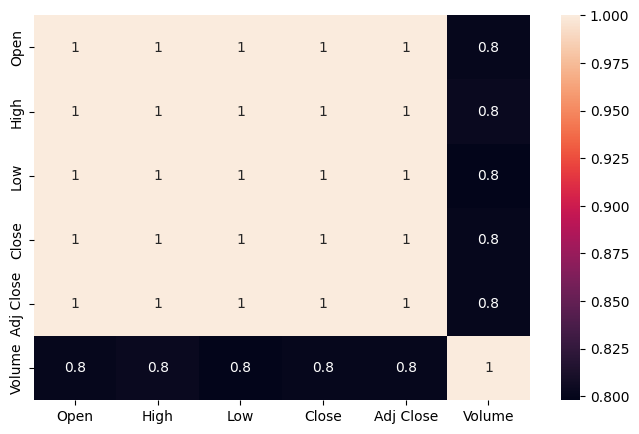

In [34]:
DF1 = DF[["Open","High","Low", 'Close','Adj Close','Volume']]
plt.figure(figsize=(8, 5))
hm = sns.heatmap(DF1.corr(), annot=True)

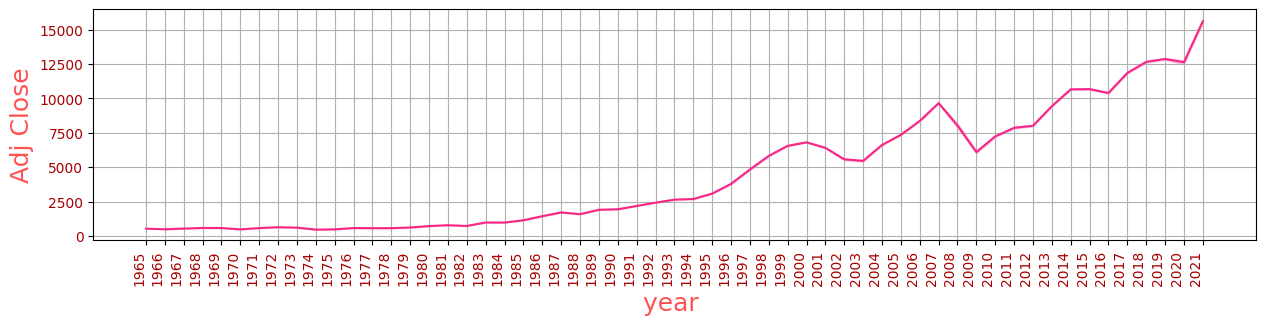

In [35]:
plt.figure(figsize=(15, 3))
color = "#f72585"
color_t = "#ff5252"
text_color = "#a70000"
custom_palette = ["#0096c7"]

plt.xticks(rotation=90, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('year ', color=color_t, fontsize=18)
plt.ylabel('Adj Close' , color=color_t, fontsize=18)
# Show the plot
sns.lineplot(x="year", y="Adj Close", data=DF , color = color)
plt.grid()
# displaying the plot
plt.show()

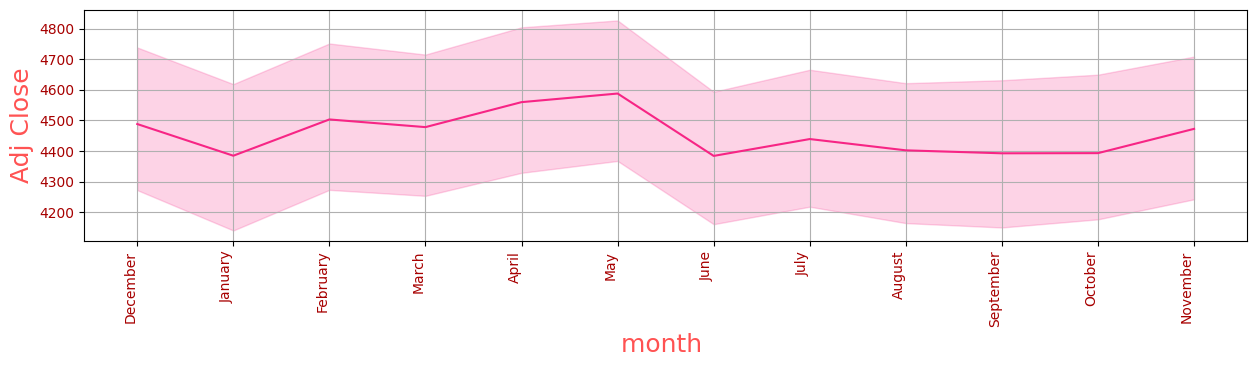

In [36]:
plt.figure(figsize=(15, 3))
color = "#f72585"
color_t = "#ff5252"
text_color = "#a70000"
custom_palette = ["#0096c7"]

plt.xticks(rotation=90, ha='right', color=text_color)
plt.yticks(rotation=0, ha='right', color=text_color)
plt.xlabel('month ', color=color_t, fontsize=18)
plt.ylabel('Adj Close' , color=color_t, fontsize=18)
# Show the plot
sns.lineplot(x="month", y="Adj Close", data=DF , color = color)
plt.grid()
# displaying the plot
plt.show()

In [37]:
fig = go.Figure(data=[go.Candlestick(x=DF['year'],
                open=DF['Open'],
                high=DF['High'],
                low=DF['Low'],
                close=DF['Close'])])

fig.show()